# Projeto ICD
## Dados de super heróis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style('whitegrid')
sns.color_palette('tab10')
heroes = pd.read_csv('dc-wikia-data.csv', sep=',')

heroes['Index'] = heroes.index
heroes['ALIGN'] = heroes['ALIGN'].fillna('Unknown')
heroes['ID'] = heroes['ID'].fillna('Not Especified')
heroes['HAIR'] = heroes['HAIR'].fillna('Unknown')
heroes['SEX'] = heroes['SEX'].fillna('Not Especified')
heroes['GSM'] = heroes['GSM'].fillna('Straight Characters')
heroes['ALIVE'] = heroes['ALIVE'].fillna('Unknown')
heroes['FIRST APPEARANCE'] = heroes['FIRST APPEARANCE'].fillna('Unknown')
heroes['APPEARANCES'] = heroes['APPEARANCES'].fillna(0)

### Aparições:

In [2]:
print('Média:', heroes.APPEARANCES.mean())
print('Mediana:', heroes.APPEARANCES.median())
print('Desvio Padrão', heroes.APPEARANCES.std())

Média: 22.40893271461717
Mediana: 5.0
Desvio Padrão 85.25937630955289


### Ano da primeira aparição

In [3]:
print('Média:', round(heroes.YEAR.mean()))
print('Mediana:', round(heroes.YEAR.median()))
print('Desvio padrão:', round(heroes.YEAR.std()))

Média: 1990
Mediana: 1992
Desvio padrão: 17


### Boxplots:

### Ano da primeira aparição

<AxesSubplot:>

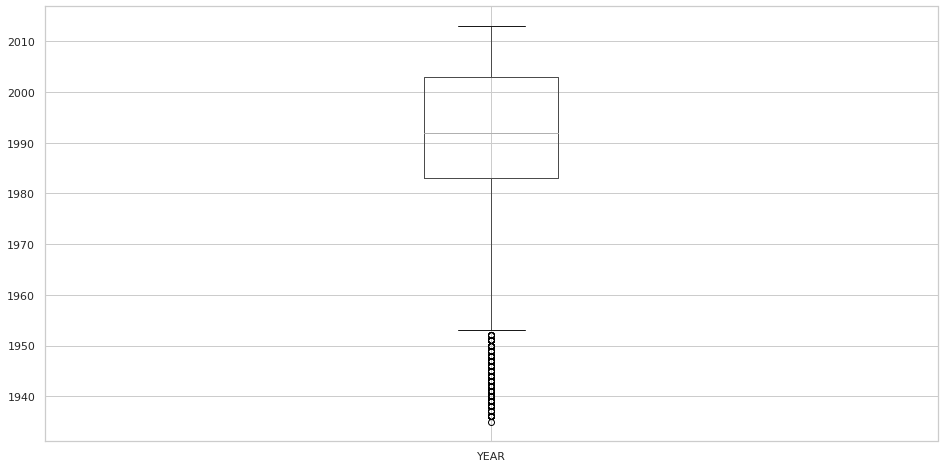

In [4]:
heroes.boxplot(column='YEAR')

### Aparições:

<AxesSubplot:>

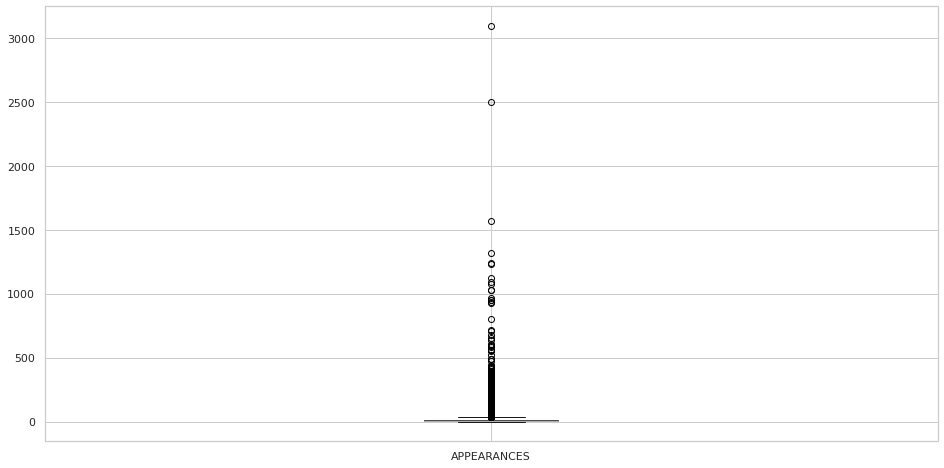

In [5]:
heroes.boxplot(column='APPEARANCES')

## Gráficos

### Quantidade de personagens por "alinhamento"

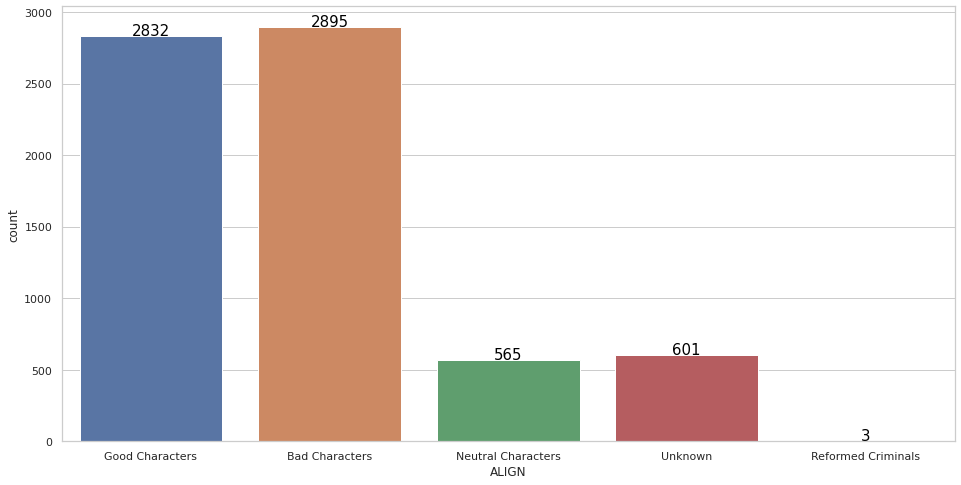

In [6]:
grafico = sns.countplot(data=heroes, x='ALIGN')
for i in grafico.patches:
    grafico.annotate(i.get_height(), (i.get_x() + i.get_width() / 2, i.get_height()),
                     ha='center', va='baseline', fontsize=15, color='black', xytext=(0,1),
                    textcoords='offset points')

### Quantidade de personagens criados por ano

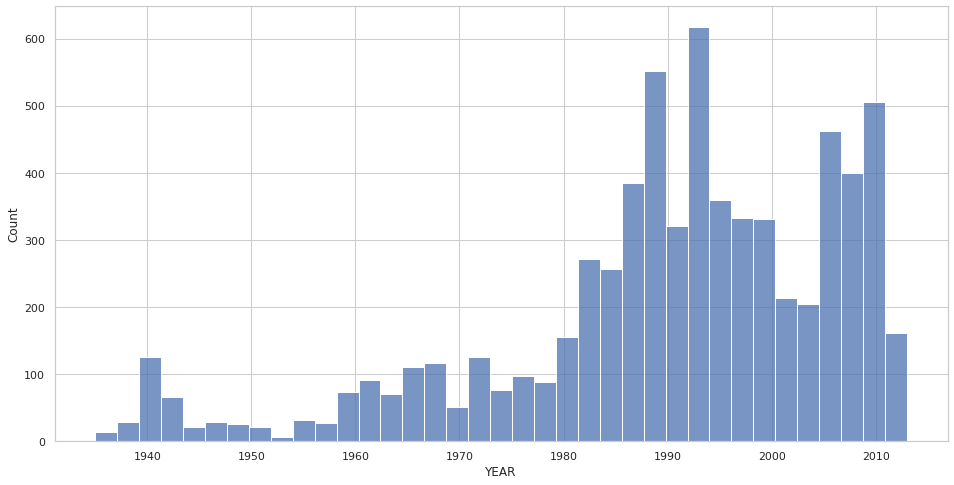

In [7]:
grafico = sns.histplot(heroes['YEAR'])

### Quantidade de aparências dos personagens por ano da primeira aparição

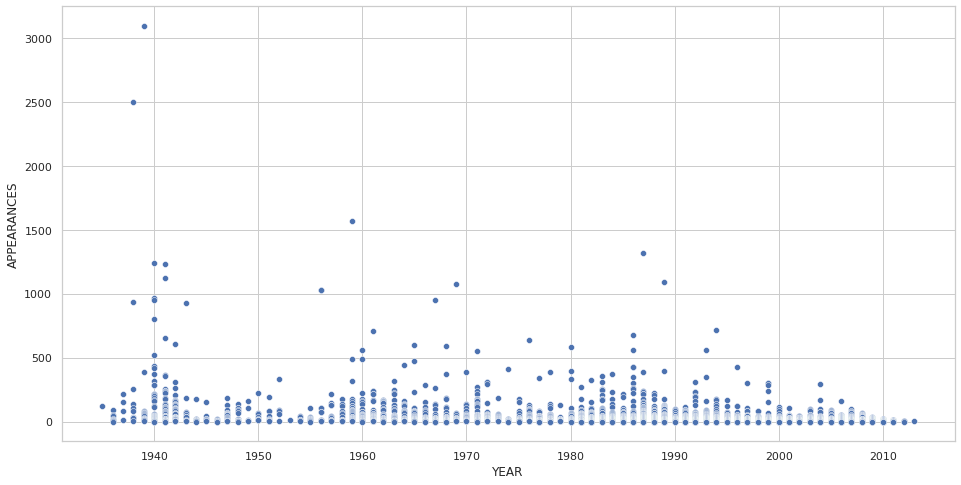

In [8]:
grafico = sns.scatterplot(data=heroes, x='YEAR', y='APPEARANCES')

## Limpeza e Transformação

Foi realizada a limpeza de várias colunas com valores vazios com a função fillna() do pandas, e a exclusão de alguns personagens em que o ano não era apresentado em uma tabela temporária para facilitar o agrupamento.

## Agrupamento

In [9]:
heroes_temp = heroes.copy()
heroes_temp['APPEARANCES'].fillna(0, inplace=True)
heroes_temp = heroes_temp[heroes_temp['YEAR'].notna()]

In [10]:
heroes_group = heroes_temp[['YEAR', 'APPEARANCES']]

In [11]:
kmeans = KMeans(n_clusters=2)

In [12]:
kmeans.fit(heroes_group)

KMeans(n_clusters=2)

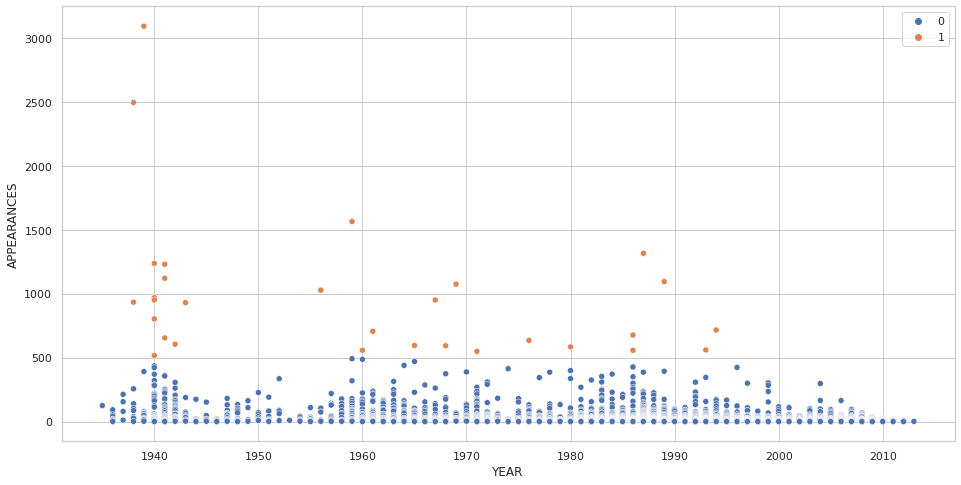

In [13]:
grafico = sns.scatterplot(data=heroes_group, x='YEAR', y='APPEARANCES', hue=kmeans.labels_)

Observamos claramente que a data de primeira publicação não tem tanta influência na quantidade de aparições dos personagens como poderíamos imaginar e que há uma diferença significativa entre a quantidade de personagens com mais de 500 aparições e os demais personagens, o que nos levar a entender que há um nicho bem definido que se mantém inalterado há bastante tempo.

## Perguntas

#### Qual a cor de olhos mais presente entre os heróis da DC comics?

In [14]:
heroes['EYE'].value_counts().idxmax()

'Blue Eyes'

Olhos azuis são os mais presentes entre todos os personagens.

#### Qual a correlação entre o número de aparições e data da primeira publicação?


In [15]:
heroes[['APPEARANCES', 'YEAR']].corr()

,APPEARANCES,YEAR
APPEARANCES,1.000000,-0.258616
YEAR,-0.258616,1.000000


Notamos que não há uma correlação forte, como também pode ser percebido no agrupamento anterior.

#### Qual a proporção de personagens bons e maus?

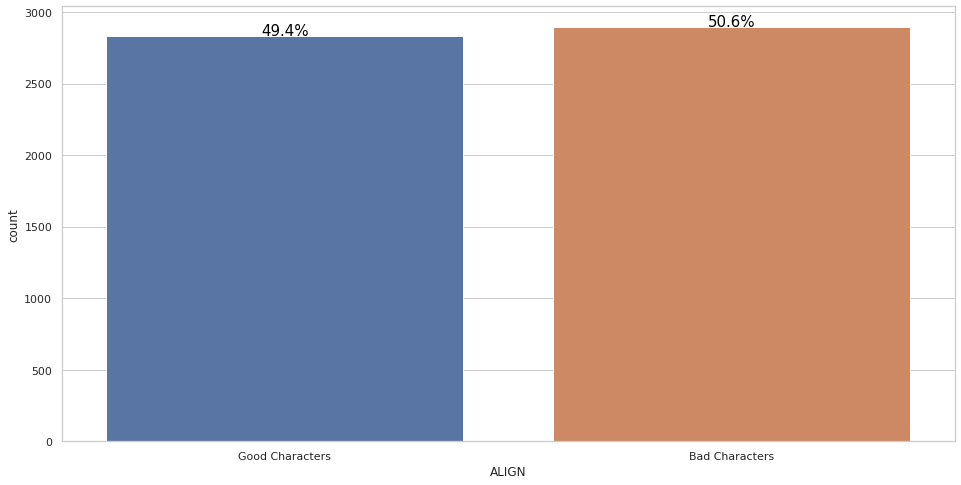

In [16]:
heroes_tmp = heroes[(heroes['ALIGN'] == 'Bad Characters') | (heroes['ALIGN'] == 'Good Characters')]
grafico = sns.countplot(data=heroes_tmp, x='ALIGN')
total = float(len(heroes_tmp['ALIGN']))
for i in grafico.patches:
    grafico.annotate('{:.1f}%'.format(100 * i.get_height()/total), (i.get_x() + i.get_width() / 2, i.get_height()),
                     ha='center', va='baseline', fontsize=15, color='black', xytext=(0,1),
                     textcoords='offset points')

Proporção de 49,4% para 50,6%, onde surpreendentemente temos mais personagens "maus" do que "bons".